# Data As Material Class 14

## Running Code in Jupyter Notebook Examples:

In [1]:
#print ('Hello World')
#7+11
#35-24
#8 * 8
#30/3
#3 ** 2


## Basic `Commands`

In [2]:
#x = 12
#type (5.579)
#type (x)
#round (5.579,2)
#fruits = ["apple","banana","cherry"]
#len (fruits)

## Exercise 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
df = pd.read_json('https://data.cdc.gov/resource/3nnm-4jni.json?state=New%20York')
type(df)
#df

pandas.core.frame.DataFrame

In [5]:
#df
#df.shape
#df.head()
#df.tail()
#df.iloc[5]
#df.loc[553:558]
#df.iloc[:,:3]
#df[['county','county_fips','state']]
#df.describe()
##skewness, median mean compare
#dropping columns
#renaming columns
#data types of columns
#df.dtypes

## Subset Data to 5 Boroughs

In [6]:
five_boroughs = [36005,36061,36085,36047,36081]
subset_df = df[df.county_fips.isin(five_boroughs)]
#subset_df

In [7]:
#cd

## Clean Date Column

In [8]:
df['date_updated']= pd.to_datetime(df['date_updated'])
#df.dtypes

## File Path

In [9]:
def _getToday():
        return datetime.date.today().strftime("%Y%m%d")
outpath = r'/Users/aaronzalki/Downloads/'
filename = "%s_%s%s" % ("cdc_hosp", _getToday() ,".csv")

print (outpath + "" + filename)

/Users/aaronzalki/Downloads/cdc_hosp_20220424.csv


## Generate CSV File

In [10]:
df.to_csv((outpath + "" + filename),index = False, header=True)

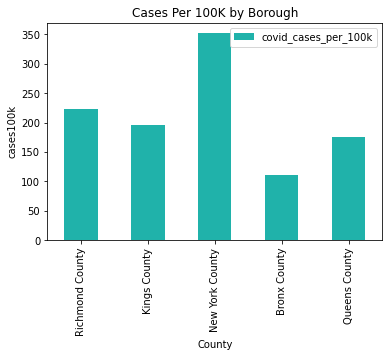

In [11]:
most_recent_date = subset_df[subset_df['date_updated'] ==  subset_df['date_updated'].max()]
most_recent_date.plot.bar(x='county',y='covid_cases_per_100k',color='lightseagreen')
plt.title('Cases Per 100K by Borough')
plt.xlabel('County')
plt.ylabel('cases100k')
plt.show()

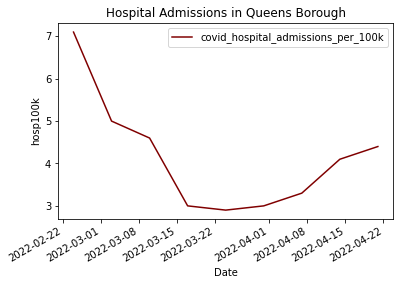

In [12]:
queens = [36081]
queens = df[df.county_fips.isin(queens)]
queens.plot(x='date_updated',y='covid_hospital_admissions_per_100k',kind='line', color='maroon')
plt.xlabel('Date')
plt.ylabel('hosp100k')
plt.title ('Hospital Admissions in Queens Borough')
plt.show()

In [13]:
queens_median = np.median(queens.covid_hospital_admissions_per_100k)
print("The median hospital admissions in Queens: " + str(queens_median))


The median hospital admissions in Queens: 4.1


In [14]:
queens_mean = round(np.mean(queens.covid_hospital_admissions_per_100k),2)
print("Mean: " + str(queens_mean))

Mean: 4.16


## Exercise 2 `Review Functions`

In [15]:
def exercise02():
    '''
    Load the CSV data from http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv into a DataFrame
    # Return the following items:
    - row_count - Total # of rows
    - avg_sq_ft - Average square feet across all transactions
    - df_zip_95670 - DataFrame containing all transactions in zip code 95670
    - df_zip_not_95610 - DataFrame containing all transactions not in zip code 95610
    '''

    # ------ Place code below here \/ \/ \/ ------
    df = pd.read_csv("https://raw.githubusercontent.com/JuliaData/CSV.jl/main/test/testfiles/Sacramentorealestatetransactions.csv") 
    row_count = df.shape[0]
    avg_sq_ft = df["sq__ft"].mean()
    df_zip_95670 = df[df.zip == 95670]
    df_zip_not_95610 = df[df.zip != 95610]
    # ------ Place code above here /\ /\ /\ ------

    return df_zip_not_95610
    #return df, row_count, avg_sq_ft, df_zip_95670, df_zip_not_95610

In [16]:
#exercise02()

## Exercise 3 `iloc` Example

In [17]:
def exercise03():
    '''
    Use the real estate transaction DataFrame and extract into a new DataFrame every 5th row using iloc 
    and just the street address and zip code columns. This can be done with one line of code.
    '''
    # ------ Place code below here \/ \/ \/ ------
    df = pd.read_csv("https://raw.githubusercontent.com/JuliaData/CSV.jl/main/test/testfiles/Sacramentorealestatetransactions.csv") 
    #every fifth row (data transforms from 985 rows to 197 rows), selecting only street address, city, zip code columns
    df = df.iloc[::5, 0:3]


    # ------ Place code above here /\ /\ /\ ------ 
    return df

In [18]:
#exercise03()

## Exercise 4 `Drug Use by Age`

In [19]:
url_path = "https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv"
df = pd.read_csv(url_path) 
#original data
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [20]:
#df.dtypes
#df.shape
#df.describe()
#df.min
#df.max

In [21]:
#pd.melt allows me to convert columns into rows
#https://stackoverflow.com/questions/28654047/pandas-convert-some-columns-into-rows

alcohol_use = pd.melt (df, value_vars = ['alcohol-use'], var_name = 'Drug', value_name = 'Percentage Use')
marijuana_use = pd.melt (df, value_vars = ['marijuana-use'], var_name = 'Drug', value_name = 'Percentage Use')
cocaine_use = pd.melt (df, value_vars = ['cocaine-use'], var_name = 'Drug', value_name = 'Percentage Use')
crack_use = pd.melt (df, value_vars = ['crack-use'], var_name = 'Drug', value_name = 'Percentage Use')
heroin_use = pd.melt (df, value_vars = ['heroin-use'], var_name = 'Drug', value_name = 'Percentage Use')
hallucinogen_use = pd.melt (df, value_vars = ['hallucinogen-use'], var_name = 'Drug', value_name = 'Percentage Use')
oxycontin_use = pd.melt (df, value_vars = ['oxycontin-use'], var_name = 'Drug', value_name = 'Percentage Use')
meth_use = pd.melt (df, value_vars = ['meth-use'], var_name = 'Drug', value_name = 'Percentage Use')

#age_group is the categorical variable
age_group = df['age']
#sample size column will be used later in creating a new column
samplesize = df['n']

#appending the rows together
drug_use = alcohol_use.append(marijuana_use)
drug_use = drug_use.append(cocaine_use)
drug_use = drug_use.append(crack_use)
drug_use = drug_use.append(heroin_use)
drug_use = drug_use.append(hallucinogen_use)
drug_use = drug_use.append(oxycontin_use)
drug_use = drug_use.append(meth_use)

#I chose 8 drugs to analyze and will need the age groups repeated for each drug
age_repeated = pd.concat([age_group]*8, ignore_index=True)

#The same will apply for sample size
samplesize_repeated = pd.concat([samplesize]*8, ignore_index=True)

subset_df = pd.concat([age_repeated.reset_index(drop=True), drug_use.reset_index(drop=True)], axis=1)
#Append the sample size
final_subset = pd.concat([samplesize_repeated.reset_index(drop=True), subset_df.reset_index(drop=True)], axis=1)

#Confirming there are 136 rows since 17 age groups * 8 drugs
final_subset.tail()

,n,age,Drug,Percentage Use
131,2628,26-29,meth-use,0.6
132,2864,30-34,meth-use,0.4
133,7391,35-49,meth-use,0.2
134,3923,50-64,meth-use,0.2
135,2448,65+,meth-use,0.0


In [22]:
#rename columns
final_subset.rename(columns={'n':'Sample Size','age':'Age Group', 'Drug':'Drug Type', 'Percentage Use':'% Use'}, inplace=True)
final_subset

,Sample Size,Age Group,Drug Type,% Use
0,2798,12,alcohol-use,3.9
1,2757,13,alcohol-use,8.5
2,2792,14,alcohol-use,18.1
3,2956,15,alcohol-use,29.2
4,3058,16,alcohol-use,40.1
...,...,...,...,...
131,2628,26-29,meth-use,0.6
132,2864,30-34,meth-use,0.4
133,7391,35-49,meth-use,0.2
134,3923,50-64,meth-use,0.2


In [23]:
#similar to calculated field in Tableau
final_subset['Age Group Size'] = (final_subset['Sample Size'] * final_subset['% Use'])/100
final_subset

,Sample Size,Age Group,Drug Type,% Use,Age Group Size
0,2798,12,alcohol-use,3.9,109.122
1,2757,13,alcohol-use,8.5,234.345
2,2792,14,alcohol-use,18.1,505.352
3,2956,15,alcohol-use,29.2,863.152
4,3058,16,alcohol-use,40.1,1226.258
...,...,...,...,...,...
131,2628,26-29,meth-use,0.6,15.768
132,2864,30-34,meth-use,0.4,11.456
133,7391,35-49,meth-use,0.2,14.782
134,3923,50-64,meth-use,0.2,7.846


In [24]:
#sorting the data 
final_subset.sort_values(['% Use', 'Age Group Size', 'Drug Type'], ascending=[False,False,False], inplace=True)
final_subset

,Sample Size,Age Group,Drug Type,% Use,Age Group Size
10,4707,22-23,alcohol-use,84.2,3963.294
9,2354,21,alcohol-use,83.2,1958.528
11,4591,24-25,alcohol-use,83.1,3815.121
12,2628,26-29,alcohol-use,80.7,2120.796
13,2864,30-34,alcohol-use,77.5,2219.600
...,...,...,...,...,...
52,2757,13,crack-use,0.0,0.000
53,2792,14,crack-use,0.0,0.000
55,3058,16,crack-use,0.0,0.000
67,2448,65+,crack-use,0.0,0.000


In [25]:
#removing 11 rows based on a condition that Sample Size * Percentage Usage is NOT zero
not_zero = final_subset['Age Group Size']!= 0
finaldf = final_subset[not_zero]
finaldf

,Sample Size,Age Group,Drug Type,% Use,Age Group Size
10,4707,22-23,alcohol-use,84.2,3963.294
9,2354,21,alcohol-use,83.2,1958.528
11,4591,24-25,alcohol-use,83.1,3815.121
12,2628,26-29,alcohol-use,80.7,2120.796
13,2864,30-34,alcohol-use,77.5,2219.600
...,...,...,...,...,...
36,2792,14,cocaine-use,0.1,2.792
103,2757,13,oxycontin-use,0.1,2.757
120,2757,13,meth-use,0.1,2.757
35,2757,13,cocaine-use,0.1,2.757


In [26]:
#aggregating data
df_plot = finaldf.groupby('Age Group')['Age Group Size'].agg('sum')
df_plot2 = finaldf.groupby ('Drug Type')['Age Group Size'].agg('mean')

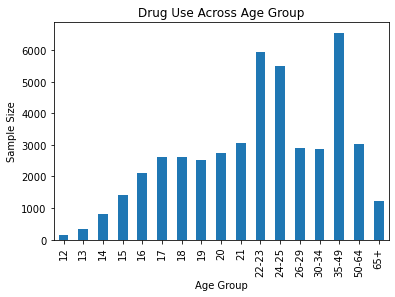

In [27]:
df_plot.plot(kind='bar',x='Age Group',y='Age Group Size')
plt.title('Drug Use Across Age Group')
plt.ylabel('Sample Size')
plt.show()

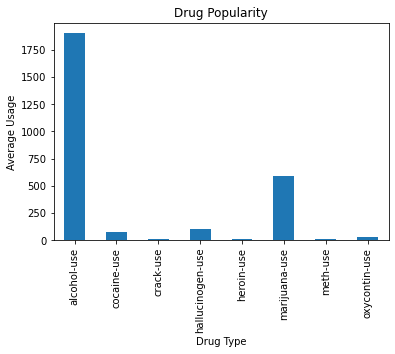

In [28]:
df_plot2.plot(kind='bar',x='Drug Type',y='Average Usage')
plt.title('Drug Popularity')
plt.ylabel('Average Usage')
plt.show()